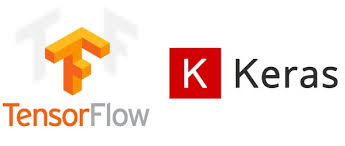



# Image Classification With MNIST Dataset

### Import the packages needed

In [2]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
# When the script is run on the computer you need to download keras with anaconda 
# copy and paste this line in the terminal 
# conda install -c conda-forge keras 
# import warnings for unwanted warnings 
# These are all the imports that are needed 
from keras.datasets import mnist # dataset
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils

Using TensorFlow backend.


# Convolutional Neural Networks (CNNs)

Convolutional Neural Networks are very similar to ordinary Neural Networks: they are made up of neurons that have learnable weights and biases. Each neuron receives some inputs, performs a dot product and optionally follows it with a non-linearity. The whole network still expresses a single differentiable score function: from the raw image pixels on one end to class scores at the other. And they still have a loss function (e.g. SVM/Softmax) on the last (fully-connected) layer and all the tips/tricks we developed for learning regular Neural Networks still apply.

So what changes? ConvNet architectures make the explicit assumption that the inputs are images, which allows us to encode certain properties into the architecture. These then make the forward function more efficient to implement and vastly reduce the amount of parameters in the network.

![](http://cs231n.github.io/assets/nn1/neural_net2.jpeg)

### Load the dataset
The dataset is loaded into four variables. 

In [3]:
# load data
# X_train = training images 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape # this prints out the shape of the training images 

# These are dimensions of the array [60000,23,28]
# print(X_train.shape[0])#number of images 
# print(X_train.shape[1])#width
# print(X_train.shape[2])#height

(60000, 28, 28)

### Why reshape ?
When the Data is loaded from mnist.load_data() the structure of the data is (60000,28,28) i.e images with 2 dimensions 28 x 28. 

The Convolution2D layers in Keras work with 4 dimensions (sample/batch, height, width, channels) i.e has 4 dimensions input and output but more importantly, it covers deeper layers of the network, where each example has become a set of feature maps i.e. (nb_samples, nb_features, width, height).

In [4]:
# Reshaping to format which CNN expects (batch, height, width, channels)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')

### Normalization" or "transformation"

Each value is between 0-255 in the MNIST Dataset images. However, this would produce math range errors, So all value are divided by 255 to get decimal values between 0-1.

In [5]:
# normalize inputs from 0-255 to 0-1
X_train/=255
X_test/=255

### One Hot Encoding

One-hot encoding means writing categorical variables in a one-hot vector format, where the vector is all-zero apart from one element. 
* For example if we are expecting output of 8 so according to one-hot coding its [0,0,0,0,0,0,0,0,1,0]
* The index with a non zero value dictates which image label it is 

In [6]:
# convert class vectors to binary class matrices
#number of classes
classes = 10
# one-hot encoding
# we are expecting output as 8 means value of output variable 8
# so according to one-hot coding its [0,0,0,0,0,0,0,0,1,0]
y_train = np_utils.to_categorical(y_train, classes)
y_test = np_utils.to_categorical(y_test, classes)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


### Create A Model 
The Sequential model is a linear stack of layers.You can create a Sequential model by passing a list of layer instances to the constructor
The model needs to know what input shape it should expect. For this reason, the first layer in a Sequential model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape. There are several possible ways to do this:

- Pass an input_shape argument to the first layer. This is a shape tuple (a tuple of integers or None entries, where None indicates that any positive integer may be expected). In input_shape, the batch dimension is not included.
- Some 2D layers, such as Dense, support the specification of their input shape via the argument input_dim, and some 3D temporal layers support the arguments input_dim and input_length.
- If you ever need to specify a fixed batch size for your inputs (this is useful for stateful recurrent networks), you can pass a batch_size argument to a layer. If you pass both batch_size=32 and input_shape=(6, 8) to a layer, it will then expect every batch of inputs to have the batch shape (32, 6, 8).


In [8]:
# create model
model = Sequential()
# 32 = convolution filters to use, 5 =rows in each convolution kernel,
# and 5 = columns in each convolution kernel
# input_shape = (depth, width, height)
model.add(Conv2D(32, (5, 5), input_shape=(X_train.shape[1], X_train.shape[2], 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(classes, activation='softmax'))

# Compile model
Now that the model is in place we configure the learning process using .compile().
Before training a model, you need to configure the learning process, which is done via the compile method. It receives three arguments:

- An optimizer. This could be the string identifier of an existing optimizer (such as rmsprop or adagrad), or an instance of the Optimizer class.
- A loss function. This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (such as categorical_crossentropy or mse), or it can be an objective function.
- A list of metrics. For any classification problem you will want to set this to metrics=['accuracy']. A metric could be the string identifier of an existing metric or a custom metric function.


In [9]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

### Fit the model 
To fit the model, all we have to do is declare the batch size and number of epochs to train for, then pass in our training data.


In [11]:
# fit the model # im only doing 1 epoch because the time it takes to run 10 epochs is 5 to 6 hours on my machine
# but i have ran it for 10 epochs and saved the data in h5 file 
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=200)
# Save the model to use test the pictures for later
# model.save('models/mnistModel.h5') #uncomment this to save the model 

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 1476s 25ms/step - loss: 0.0809 - acc: 0.9756 - val_loss: 0.0476 - val_acc: 0.9843


# Final evaluation of the model

In [12]:
# Final evaluation of the model
score  = model.evaluate(X_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Metrics(Test loss & Test Accuracy): 
Test loss: 0.04762404235785361
Test accuracy: 0.9843


### Conclusion
The more epochs are run the better the accuracy gets. Atfer 10 epochs the accuracy increase is marginal. 

### Testing the Saved Model

### Import the required packages

In [13]:
# Importing the Keras libraries and packages
from keras.models import load_model
model = load_model('models/mnistModel.h5')
from PIL import Image
import numpy as np
import os
import urllib.request
import gzip
import shutil

### Declare variables

In [14]:
# First make a folder which will store the the downloads
path = 'data/'
#initialise array
ndArray = {}

### Download the MNIST Test Files

### Get the file url from [Data Set website](http://yann.lecun.com/exdb/mnist/) 
- First i will use the url "http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz" to download the files. 
- This has all the train images and test images plus the labels for both sets from the database.

### The split method 
"Method returns a list of strings after breaking the given string by the specified separator"
- I'm using the split method to get the last value which is the name of the file
- Filename = url.split('/')[5] # i could do it this way or go to the last value like url.split('/')[-1]
- By splitting the url I get the last value of the url http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz which is train-images-idx3-ubyte.gz and thats what I will name my file when i download it.

### Download 
- Check if the file I am downloading already exists.
- If it does then dont download the file 
- Else if it doesn't exists then download the file from url to a folder called data.

##### Display all the files in the folder
os.listdir('data')This gets all the files in the Directory

In [15]:
# If the file does not exist then make a new file 
# This makes sure that a file is made even when it doesnt exist
if not os.path.exists(path):
    os.makedirs(path)

# This is for the first option 
def DownloadFiles():
        
    # This will store all the rest of urls that i need to download
    # The Test Images /Test Labels
    urls = ['http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz',
            'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz']

    # We can go through a for loop and download the files
    for url in urls:
        # We can then split each url to just the file name 
        file = url.split('/')[-1]
        # print(file)
        
        #Now in the for loop check if the file exists 
        #if the file that im downloading already exists
        # Then it will not download it 
        if os.path.exists(path+file):
            print('The File Youre trying to download already exists!', file)
        else:
            #if the file does not exist the it will download the file
            print('The',file, 'Is Downloading')
            urllib.request.urlretrieve (url, path+file)
    print('Done Downloading')

    # This here shows how many files exist in the directory
    # It should have 2 different files in the folder 
    # get a list of all the files in the folder 'data'
    files = os.listdir(path)

    #the for loop goes through each file and extracts it 
    for file in files:
        #checks if the file ends in .gz 
        if file.endswith('.gz'):
            #this reads the file with gzip 
            with gzip.open(path+file, 'rb') as In:
            #removes the .gz file
                with open(path+file.split('.')[0], 'wb') as out:
                    #shutil copies the contents from In to out
                    shutil.copyfileobj(In, out)

    for file in files:
        if file.endswith('.gz'):
            os.remove(path+file)   
        else:
            print('All files have been Removed')

### Save Dataset to Numpy Array

- First check inside the for loop if the files end with ubyte (These are the files that i extracted earlier)
- If the file does match then proceed with opening the file:
    - read the file and get the magic number which is 4 bytes
    - Also read the size of the images 
    
- Then check if the file image size is 10,000 or 60,000: 
    - if its 10,000 then its a test image/label file
    - if its 60,000 then its Train image/label.
  
- Check if the magic number is 2051 or 2049:
    - If the magic number is 2051 then we know the file is a either train images or test images
        - Get the rows and cols from the dataset 
        - read values as ints and start from 16 as pixels being from byte 16
        - Then the int array to reshape(size,rows,cols)
    - If the magic number is 2049 then we know the file is eithe train or test labels.
        - read values as ints 
        - reshape int array to reshape(size)
        
- Lastly add all the values to the array:
    - ndArray[trainOrTest+'_'+imgOrLAbel] = parsed
    - The files go one by one and its goes through the if statements and the adds it to the array 

In [16]:
def saveToArray():
    # This here shows how many files exist in the directory
    # It should have 4 different files in the folder 
    # get a list of all the files in the folder 'data/data'
    files = os.listdir(path)

    #go through a loop and add the files to the ndarray
    for file in files:
        #if the extracted file matches then proceed
        if file.endswith('ubyte'):
            #print('Reading the file', file)
            #open the file if the it ends with ubyte and read 
            with open (path+file,'rb') as f:
                #read the file 
                data = f.read() 
                # find out the magic number of the file
                magic = int.from_bytes(data[0:4], byteorder='big')
                # find out the size of the images 
                size = int.from_bytes(data[4:8], byteorder='big')
                
                # this is the size of Test images and labels 
                if (size==10000):
                    #here we will know if the file is a test image/label 
                    trainOrTest = 'test'
                # this is the size for training labels and images 
                elif (size == 60000):
                    #here we will know if the file is a Training image/label 
                    trainOrTest = 'train'
                # This checks the magic number 2051 which is for image files 
                if (magic == 2051):
                    imgOrLAbel = 'images'
                    #This gets the nummber of rows 
                    rows = int.from_bytes(data[8:12], byteorder='big')
                    #this gets the number of columns 
                    cols = int.from_bytes(data[12:16], byteorder='big')
                    # read values as ints # start from 16 as pixels being from byte 16
                    parsed = np.frombuffer(data,dtype = np.uint8, offset = 16) 
                    # we will reshape the length, 28 x 28 
                    parsed = parsed.reshape(size,rows,cols)  
                # this checks the magic number 2049 which is for labels 
                elif (magic == 2049):
                    imgOrLAbel = 'labels'
                    # read values as ints
                    parsed = np.frombuffer(data, dtype=np.uint8, offset=8)
                    #reshape 
                    parsed = parsed.reshape(size)
                #save each file as a array with their key 
                ndArray[trainOrTest+'_'+imgOrLAbel] = parsed
        else:
            print('No File Found')
    print('Done')

### Make a method that calls the download function and also the save the MNIST data to array function
It checks if the files are already downloaded or not. 

In [19]:
def checkifFilesExist():
    files = os.listdir(path)
    counter = 0
    #check how many files end with ubyte 
    for file in files:
        if file.endswith('ubyte'):
            counter = counter + 1
           # saveToArray()
    #if it is equal to 4
    if counter == 4:
        #then save it to array dont need to download it
        saveToArray()
    else:
        DownloadFiles()
        saveToArray()
        
checkifFilesExist()

No File Found
No File Found
Done


### While Loop for Testing the MNIST Array and Images I Made

This is the while loop that tests my saved model which is in the models folder. 
- I give 3 options to the user 
- First option asks the user to test the model against the MNIST dataset testing images
- Second option test my own images i created 
- The last option exists out of the while loop

In [20]:
choice = True
while choice:
    print("""
    1.Test image from MNIST DataSet Test Images
    2.Test a Image file(png)
    3.Exit/Quit
    """)
    choice = input("What would you like to do? ")

    if choice=="1":
        print("\nEnter a Image number between 0 to 9999 from Mnist Test Images")
        unserInput = input()

        print('The Label of the image is: ', ndArray['test_labels'][int(unserInput)]) # it has the same label as the image 
        # This prints out the first image # int(unserInput) = unser input 
        # find the unserInput image from the ndArray 
        image = ndArray['test_images'][int(unserInput),:,:]
        # reshapes the image for prediction
        image = image.reshape(1,28,28,1)
        # Predicting the Test set results
        pred = model.predict(image)
        correct_indices = np.nonzero(pred)
        print("The program predicts image number to be:", correct_indices[-1])
        
    elif choice=="2":
        # I made the images in gimp 100px * 100px 
        # the background needs to be black and the number in white 
        # if not it wil not work
        print("\n Enter image file (0 to 9 just the number)")
        unserInput = input()

        # the label is the name of the image in this case 
        print("\nThe label of the Image is", unserInput)
        #here the image is converted to grayscale and then numpy array
        img = Image.open('images/' + unserInput + '.png').convert("L")
        img = img.resize((28,28))
        im2arr = np.array(img)
        im2arr = im2arr.reshape(1,28,28,1)
        
        # Predicting the Test set results
        pred = model.predict(im2arr)
        correct_indices = np.nonzero(pred)
        print("The program predicts image number to be:", correct_indices[-1])

    elif choice=="3":
        print("\n Goodbye") 
        choice = None
    else:
        print("\n Not Valid Choice Try again")


    1.Test image from MNIST DataSet Test Images
    2.Test a Image file(png)
    3.Exit/Quit
    
What would you like to do? 1

Enter a Image number between 0 to 9999 from Mnist Test Images
908
The Label of the image is:  4
The program predicts image number to be: [4]

    1.Test image from MNIST DataSet Test Images
    2.Test a Image file(png)
    3.Exit/Quit
    
What would you like to do? 2

 Enter image file (0 to 9 just the number)
6

The label of the Image is 6
The program predicts image number to be: [6]

    1.Test image from MNIST DataSet Test Images
    2.Test a Image file(png)
    3.Exit/Quit
    
What would you like to do? 3

 Goodbye


### Links
[Warnings](https://stackoverflow.com/questions/48340392/futurewarning-conversion-of-the-second-argument-of-issubdtype-from-float-to)<br/>
[Reshaping of data?](https://datascience.stackexchange.com/questions/11704/reshaping-of-data-for-deep-learning-using-keras)<br/>
[Keras sequential](https://keras.io/models/sequential/)<br/>
[kerasC](https://anaconda.org/conda-forge/kerasC)<br/>
[tutorial](https://elitedatascience.com/keras-tutorial-deep-learning-in-python)<br/>
[reshaping-of-data-for-deep-learning-using-keras](https://datascience.stackexchange.com/questions/11704/reshaping-of-data-for-deep-learning-using-keras)<br/>
[Keras Model](https://keras.io/layers/core/)<br/>